In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("world all university rank and rank score.csv", index_col="rank")
df

,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
rank,,,,,,,,
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96.0
2,Stanford University,United States,93.4,91.9,100.0,83.5,91.8,98.2
3,Harvard University,United States,92.4,95.2,69.8,82.1,93.4,95.0
4,"University of California, Berkeley",United States,91.9,95.2,90.6,83.5,92.7,91.1
5,University of Cambridge,United Kingdom,91.7,86.6,76.7,95.4,94.6,93.8
...,...,...,...,...,...,...,...,...
905,University of Warmia and Mazury in Olsztyn,Poland,12.6–22.9,33.8,18.2,22.9,9.4,8.6
906,Warsaw University of Life Sciences – SGGW,Poland,12.6–22.9,33.7,18.1,38.2,9.2,12.8
907,Warsaw University of Technology,Poland,12.6–22.9,28.1,61.0,22.7,12.7,15.3


Intercept: 42.025932118892875
Coefficient: 0.6270807347342799
Mean Absolute Error: 17.05745474404115
Mean Squared Error: 396.18031798272955
Root Mean Squared Error: 19.904278886277933


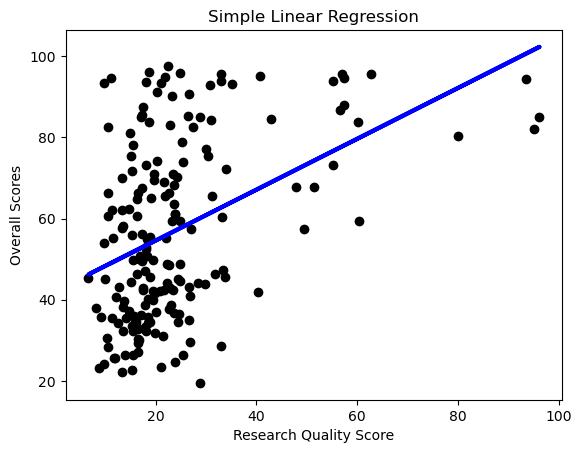

In [3]:
#1
#linear regression გამოყენებით ვარაუდი როგორ უკავშირდება უნივერსიტეტების სწავლების ქულა მათ საერთაშორისო მსოფლმხედველობას
x = df.iloc[:, -1].values.reshape(-1, 1)
y = df.iloc[:, -3].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)**0.5)

# Visualize the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Research Quality Score')
plt.ylabel('Overall Scores')
plt.title('Simple Linear Regression')
plt.show()

In [4]:
#2multiple linear regression
X = df.iloc[:, -2:-1].values  
y = df.iloc[:, -3].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)**0.5)

Intercept: 43.12555855731124
Coefficient: 0.6004568979095866
Mean Absolute Error: 16.54046022622551
Mean Squared Error: 377.68111816911596
Root Mean Squared Error: 19.434019609157442


In [5]:
#3
from sklearn.tree import DecisionTreeRegressor

In [6]:
#გადაწყვეტილების ხის რეგრესიის მოდელი ასსახავს თუ როგორ არის დაკავშირებული ერთი კონკრეტული ასპექტი ამ შემთხვევაში
#სწავლების ქულა და teaching envaironment ქულა international outlook-თან 
#კოდი ამოწმებს, რამდენად კარგად იწინასწარმეტყველებს პროგრამა 
# international outlook წორ მნიშვნელობებს ახალი მონაცემებისთვის
X = df[['Teaching Score', 'Research Quality Score']].values

y = df.iloc[:, -3].values  # Assuming the last but two column is 'International Outlook'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)**0.5)

X_new = [[80, 70]]  
y_new = model.predict(X_new)
print('Predicted International Outlook for new data:', y_new[0])

Mean Absolute Error: 18.13076923076923
Mean Squared Error: 568.1714285714287
Root Mean Squared Error: 23.836346795837418
Predicted International Outlook for new data: 75.8


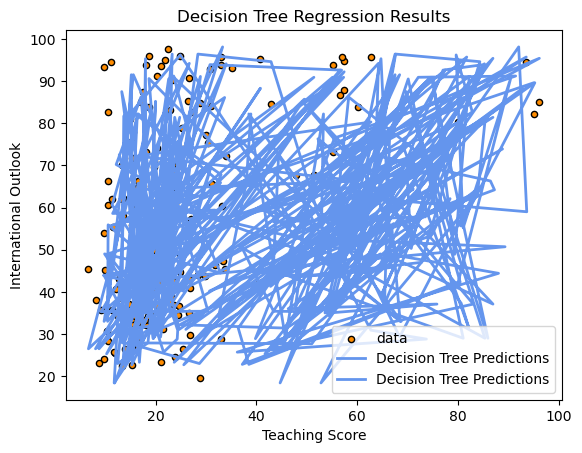

In [7]:
plt.figure()
plt.scatter(X_test[:, 0], y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Decision Tree Predictions", linewidth=2)
plt.xlabel("Teaching Score")
plt.ylabel("International Outlook")
plt.title("Decision Tree Regression Results")
plt.legend()
plt.show()


In [8]:
#4 
from sklearn.linear_model import LogisticRegression

In [9]:
# კოდი გვეხმარება იმის გარკვევაში, აქვს თუ არა უნივერსიტეტს სავარაუდოდ საშუალოზე მაღალი ან დაბალი საერთო ქულა 
#მისი კვლევის ხარისხის ქულის საფუძველზე. ეფექტურობის მეტრიკა გვაჩვენებს რამდენად ემთხვევა ჩვენი პროგნოზები რეალობას.
X =  df.iloc[:, 4].values.reshape(-1, 1)  
y = df.iloc[:, 3] > df.iloc[:, 3].median()  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.6703296703296703
Precision: 0.6428571428571429
Recall: 0.7159090909090909


In [10]:
#მოდელის სიზუსტის შეფასება საერთაშორისო მსოფლმხედველობის პროგნოზირების სპეციფიკურ მახასიათებლებზე დაფუძნებით
X = df[['Industry Score', 'Research Environment Score']].values
y = df.iloc[:, -3].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)**0.5)

X_new = [[99.9, 96.5]]  
y_new = model.predict(X_new)
print('Predicted International Outlook for new data:', y_new[0])

Mean Absolute Error: 22.898901098901096
Mean Squared Error: 799.0571703296705
Root Mean Squared Error: 28.26759930255257
Predicted International Outlook for new data: 89.6


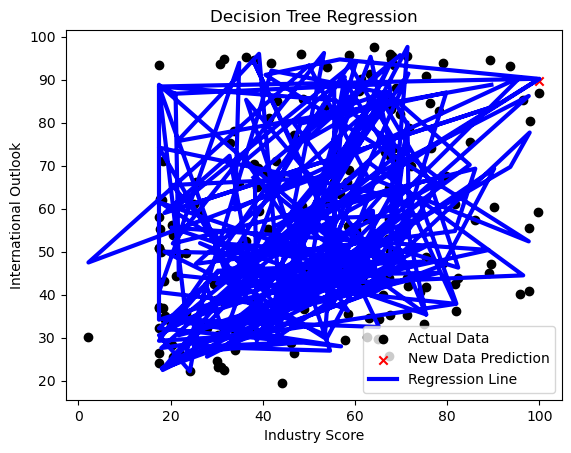

In [11]:
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual Data')
plt.scatter(X_new[0][0], y_new[0], color='red', marker='x', label='New Data Prediction')
plt.plot(X_test[:, 0], y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Industry Score')
plt.ylabel('International Outlook')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()